In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
# reading data set from provided CSV to a dataframe 'insure' using pandas
insure = pd.read_csv('insurance.csv')

In [3]:
# printing head of the dataframe 'insure'
insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#checking shape of the 'insure' dataframe
insure.shape

(1338, 7)

In [5]:
#checking data types of all columns
insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#using 'isnull' function to check missing values in dataframe
insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# using 'describe' function to print 5 point summary for numerical attributes
insure.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#to display grid in plot
sns.set(style="whitegrid")

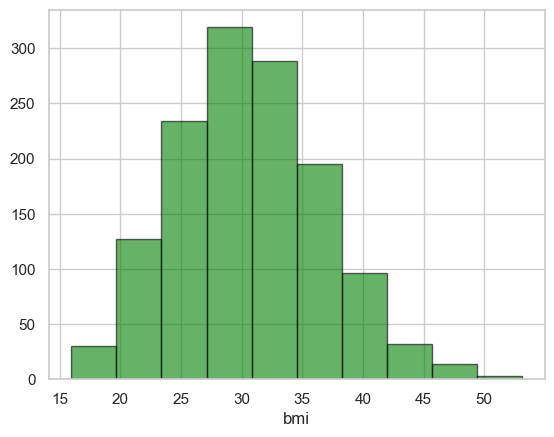

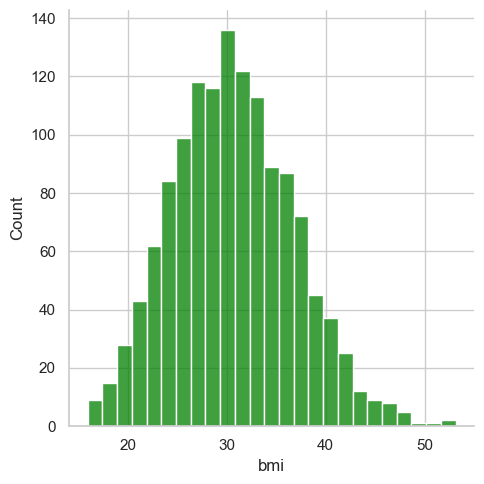

In [10]:
#ploting histogram and dist plot to see distribution of 'bmi' column
plt.hist(insure['bmi'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.displot(insure['bmi'], color= 'green')

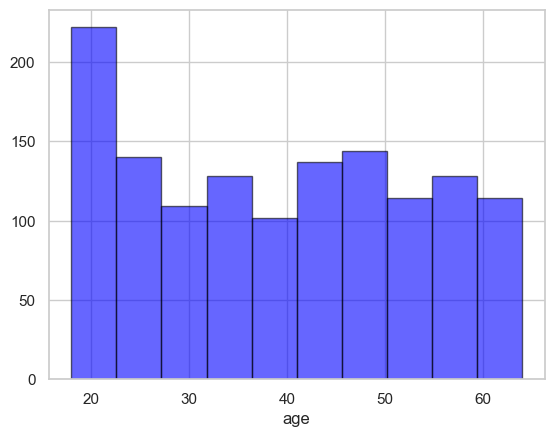

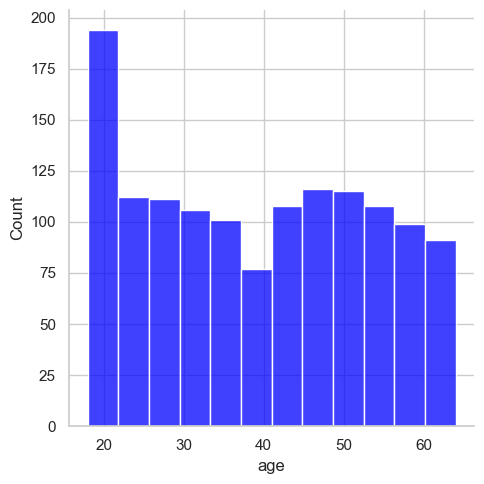

In [11]:
#ploting histogram and dist plot to see distribution of 'age' column
plt.hist(insure['age'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.displot(insure['age'], color= 'blue')

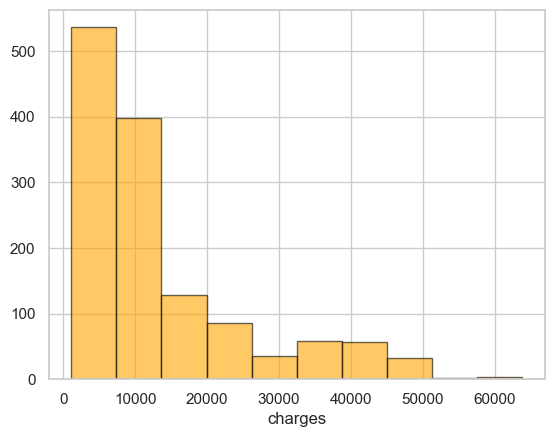

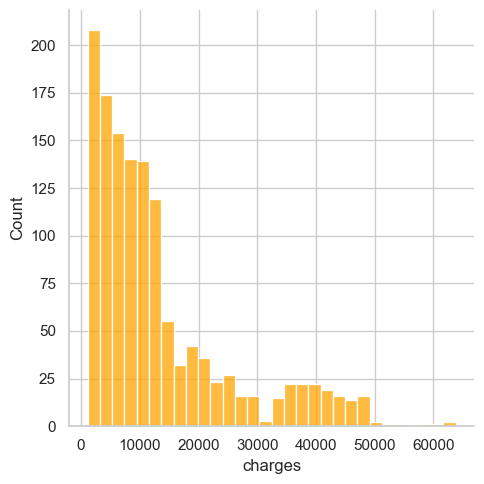

In [12]:
#ploting histogram and dist plot to see distribution of 'charages' column
plt.hist(insure['charges'], color= 'orange', edgecolor = 'black', alpha = 0.6)
plt.xlabel('charges')
plt.show()

sns.displot(insure['charges'], color= 'orange')

In [13]:
# measuring the of ‘bmi’, ‘age’ and ‘charges’ columns and storing to new dataframe
Skew = pd.DataFrame({'Skewness Value' : [stats.skew(insure.bmi), stats.skew(insure.age),stats.skew(insure.charges)]},
                    index=['bmi','age','charges'])
Skew

,Skewness Value
bmi,0.283729
age,0.055610
charges,1.514180


<AxesSubplot:xlabel='bmi'>

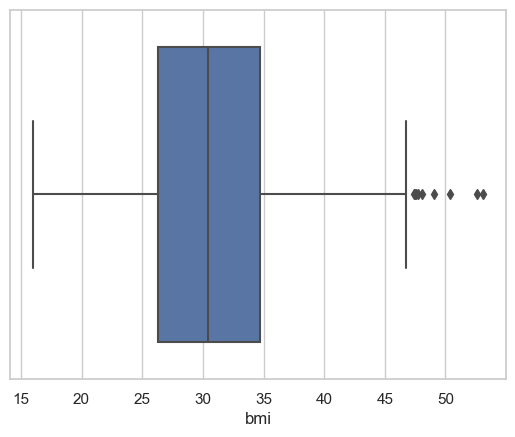

In [15]:
# plotting Box Plot for Column 'bmi'
sns.boxplot(x=insure['bmi'])

In [16]:
# calculating Q1, Q3 and IQR values
Q1 = np.percentile(insure['bmi'], 25)
Q3 = np.percentile(insure['bmi'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
bmi_out = [x for x in insure['bmi'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for bmi:', len(bmi_out))

Identified outliers for bmi: 9


<AxesSubplot:xlabel='age'>

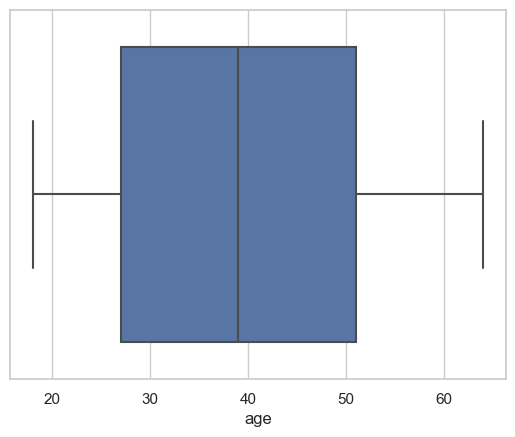

In [17]:
# plotting Box Plot for Column 'age'
sns.boxplot(x=insure['age'])

In [18]:
#Identifying the presence of outliers in "bmi" column.
Q1 = np.percentile(insure['age'], 25)
Q3 = np.percentile(insure['age'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
age_out = [x for x in insure['age'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for age:', len(age_out))

Identified outliers for age: 0


<AxesSubplot:xlabel='charges'>

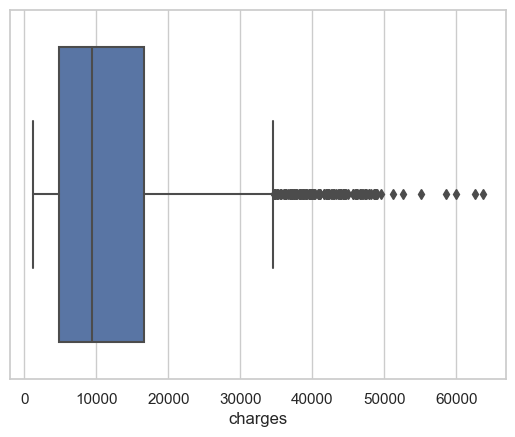

In [19]:
# plotting Box Plot for Column 'charges'
sns.boxplot(x=insure['charges'])

In [20]:
# calculating Q1, Q3 and IQR values
Q1 = np.percentile(insure['charges'], 25)
Q3 = np.percentile(insure['charges'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
charges_out = [x for x in insure['charges'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for charges:', len(charges_out))

Identified outliers for charges: 139


<AxesSubplot:xlabel='sex', ylabel='count'>

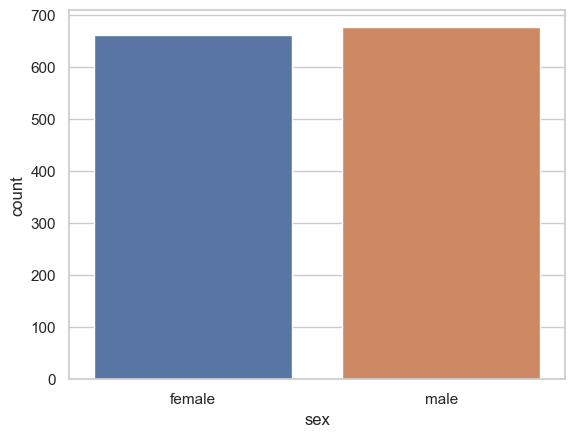

In [21]:
# plotting Count Plot for Column 'sex'
sns.countplot(x=insure['sex'])

<AxesSubplot:xlabel='sex', ylabel='charges'>

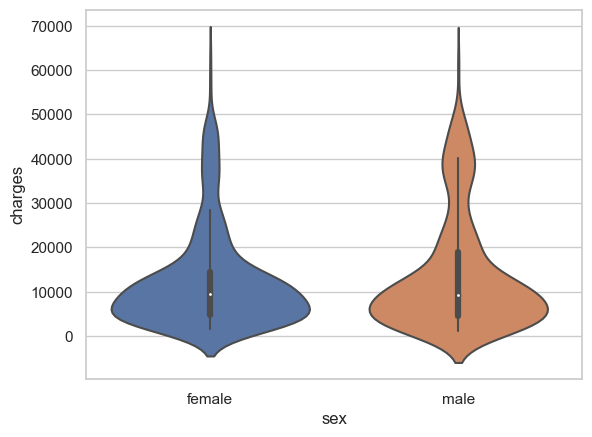

In [22]:
# plotting violin Plot for Column 'sex'
sns.violinplot(y='charges', x='sex', data=insure, split=True)

<AxesSubplot:xlabel='children', ylabel='count'>

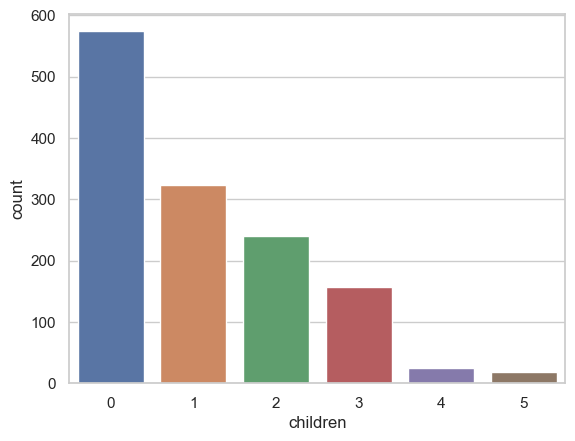

In [23]:
# plotting Count Plot for Column 'children'
sns.countplot(x=insure['children'])

<AxesSubplot:xlabel='children', ylabel='charges'>

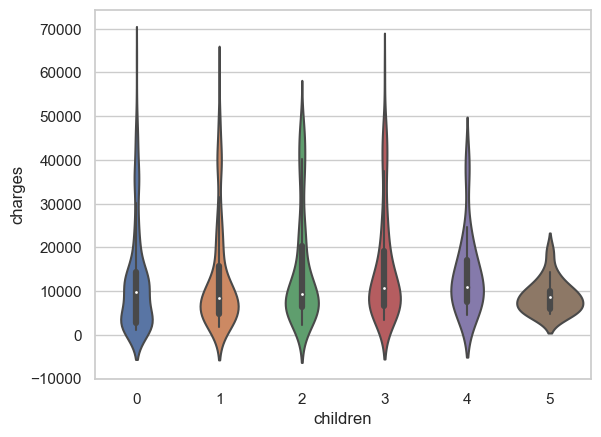

In [24]:
# plotting violin Plot for Column 'children'
sns.violinplot(y='charges', x='children', data=insure, split=True)

<AxesSubplot:xlabel='smoker', ylabel='count'>

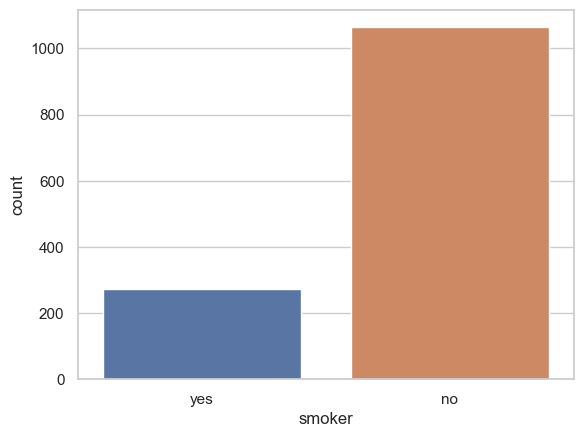

In [25]:
# plotting Count Plot for Column 'smoker'
sns.countplot(x=insure['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

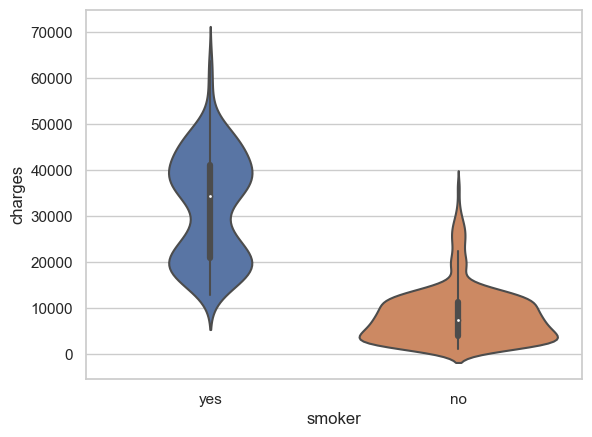

In [26]:
# plotting violin Plot for Column 'smoker'
sns.violinplot(y='charges', x='smoker', data=insure, split=True)

<AxesSubplot:xlabel='region', ylabel='count'>

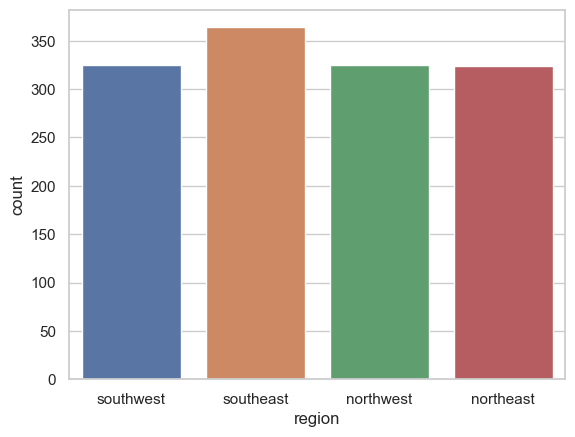

In [27]:
# plotting Count Plot for Column 'region'
sns.countplot(x=insure['region'])

<AxesSubplot:xlabel='region', ylabel='charges'>

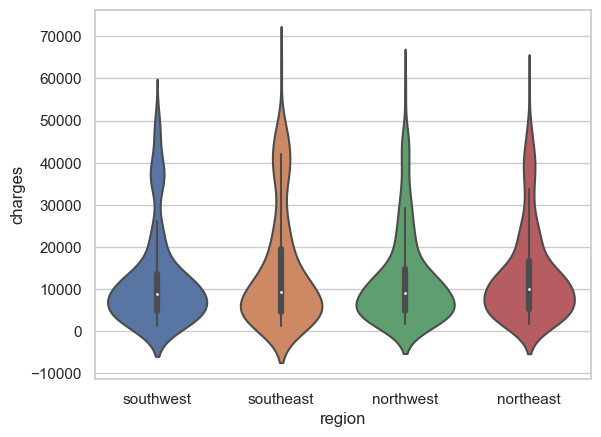

In [28]:
# plotting violin Plot for Column 'region'
sns.violinplot(y='charges', x='region', data=insure, split=True)

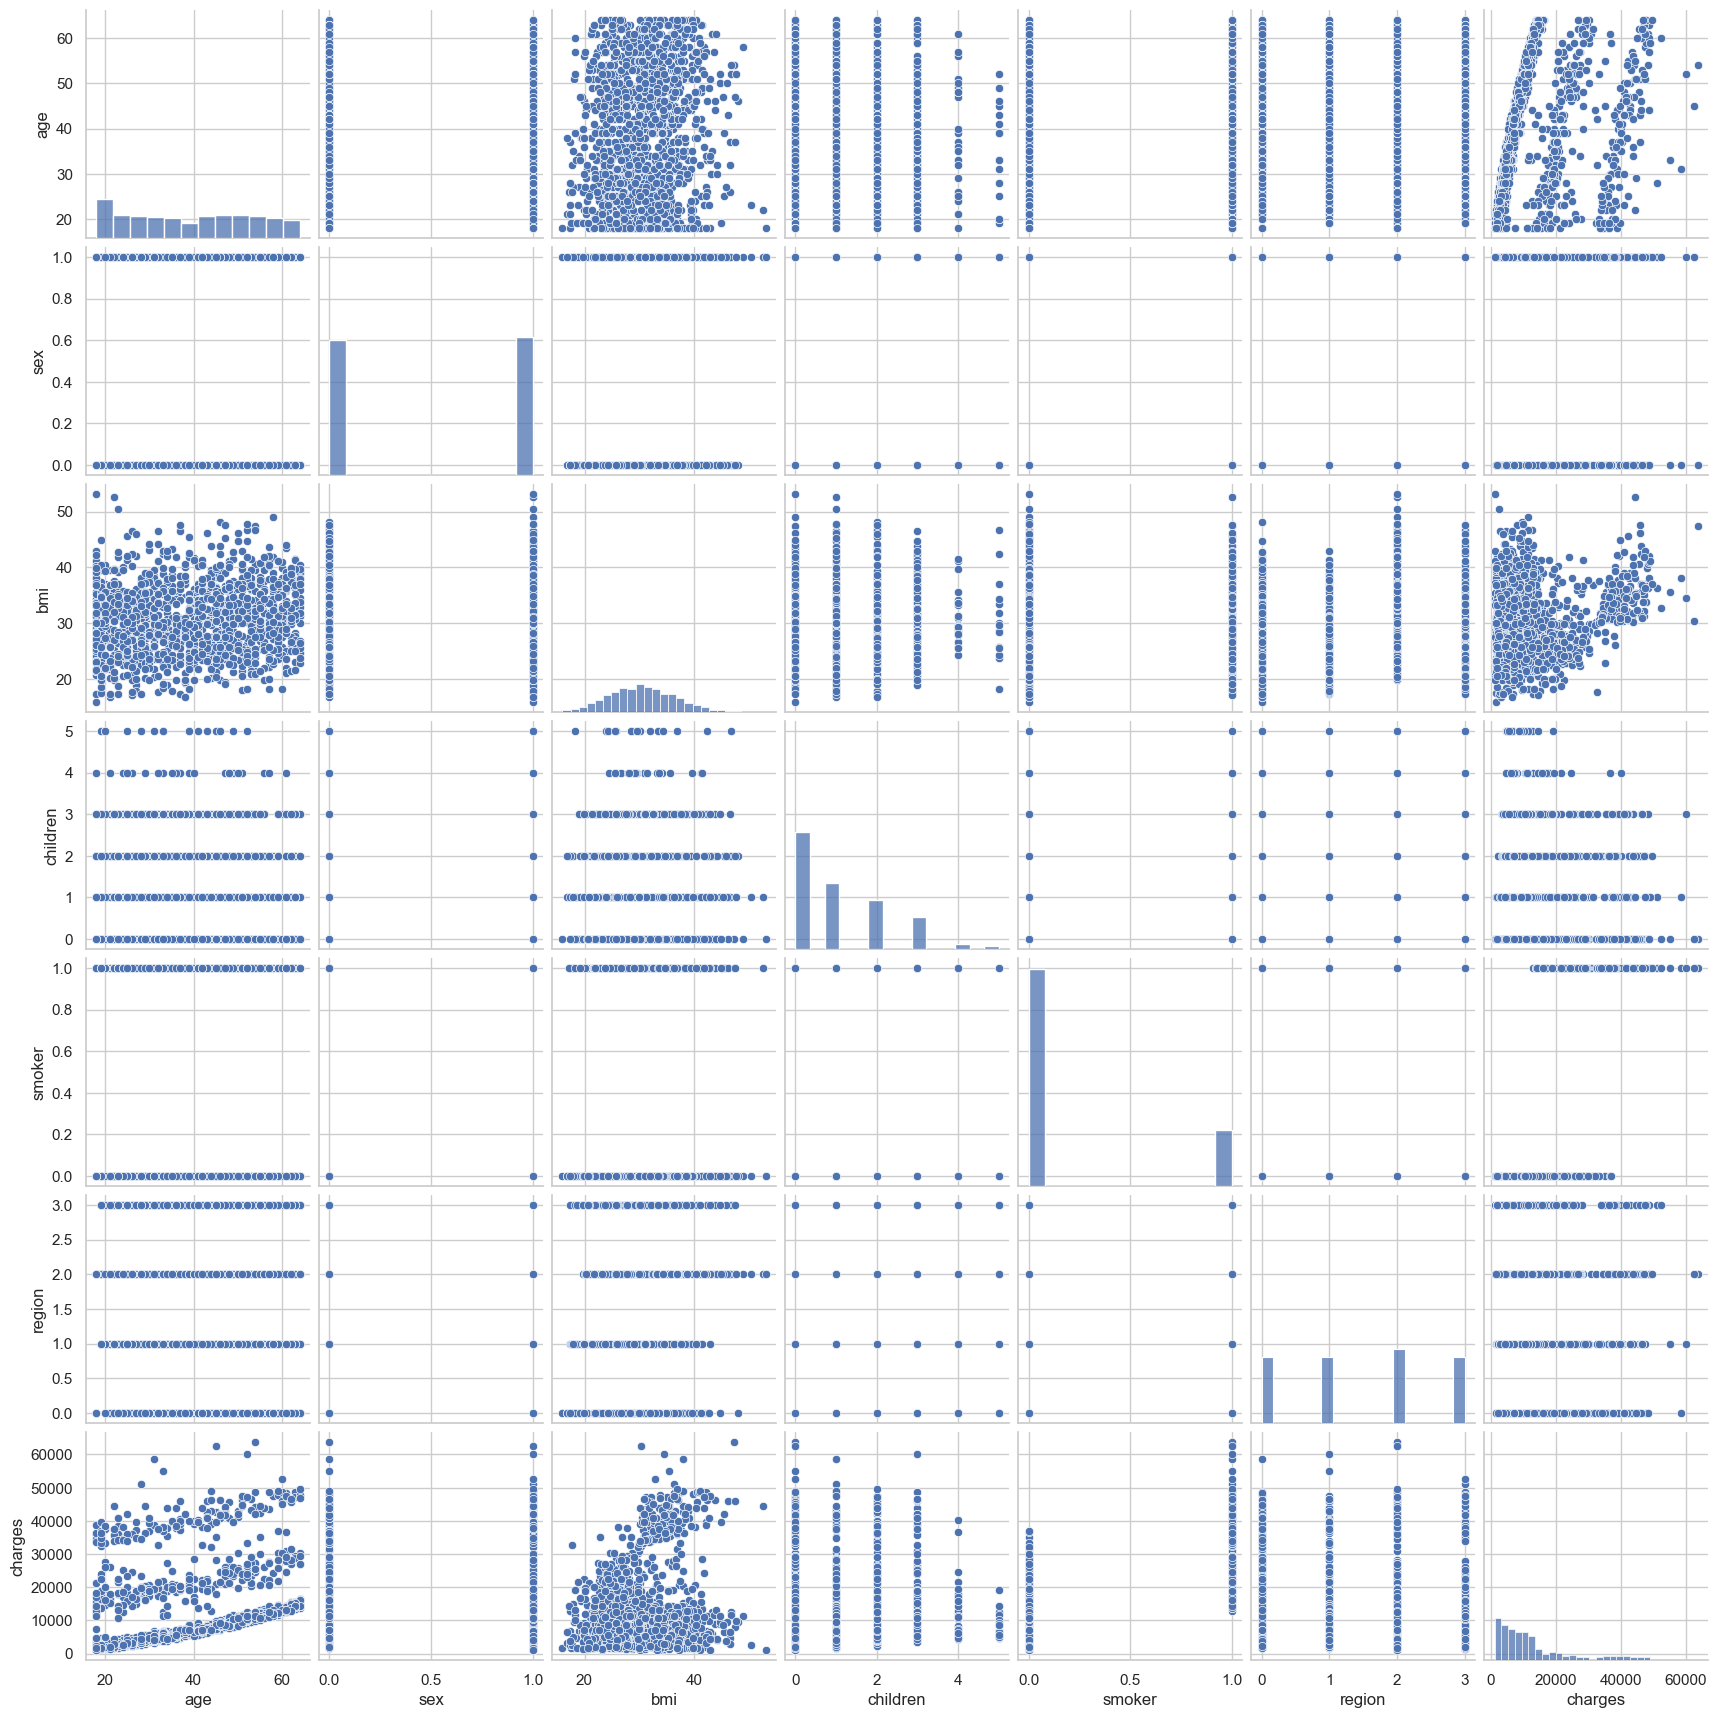

In [29]:
# creating copy of original data set
insure_copy = insure.copy()

# using label encoding to convert string values because pair plot ignores string values
insure_copy.loc[:,['sex', 'smoker', 'region']] = insure.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

# plotting pair plot for dataframe
sns.pairplot(insure_copy)
plt.show()

In [30]:
# displaying count of smokers and non-smokers
insure.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

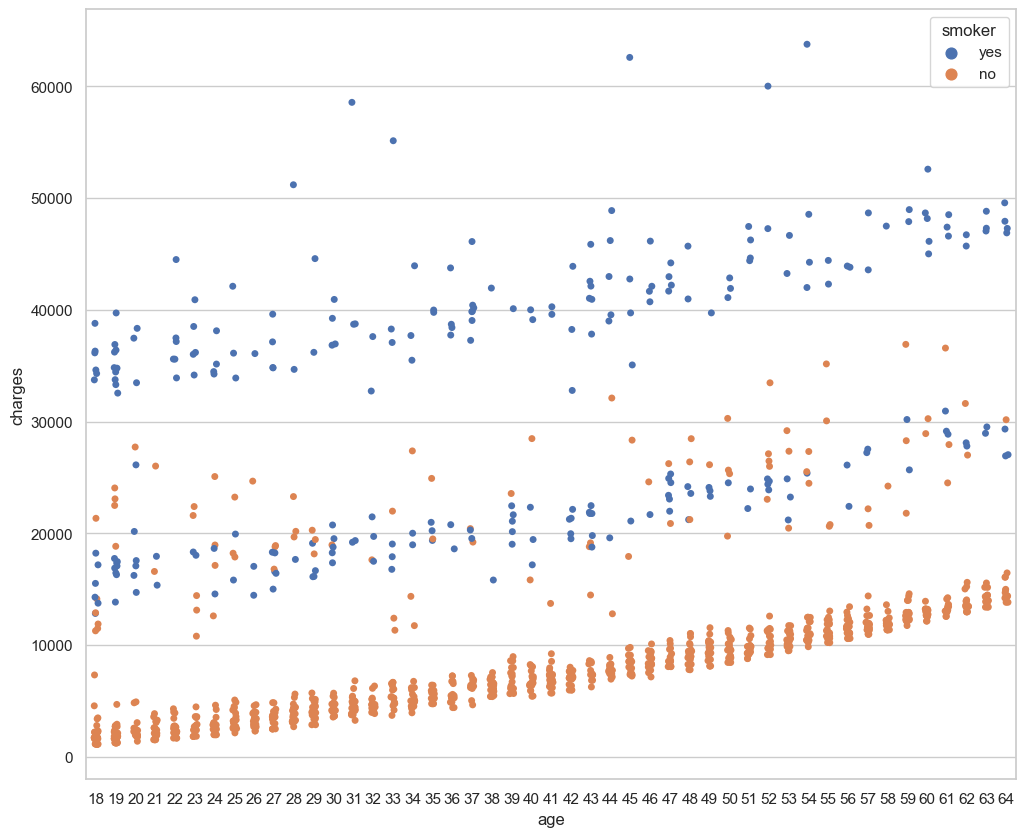

In [32]:
# plotting strip plot to make comparison over distribution of 'smoker' with respect to 'charges' and 'age'
plt.figure(figsize=(12,10))
sns.stripplot(y='charges',x='age',hue='smoker',data=insure)
plt.show()

In [33]:
# applying T-test to analyse the effect of smoking on the charges
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(insure[insure.smoker == 'yes'].charges) 
y = np.array(insure[insure.smoker == 'no'].charges)

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

print(p_value)

8.271435842179102e-283


In [34]:
# displaying count of male and females
insure.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

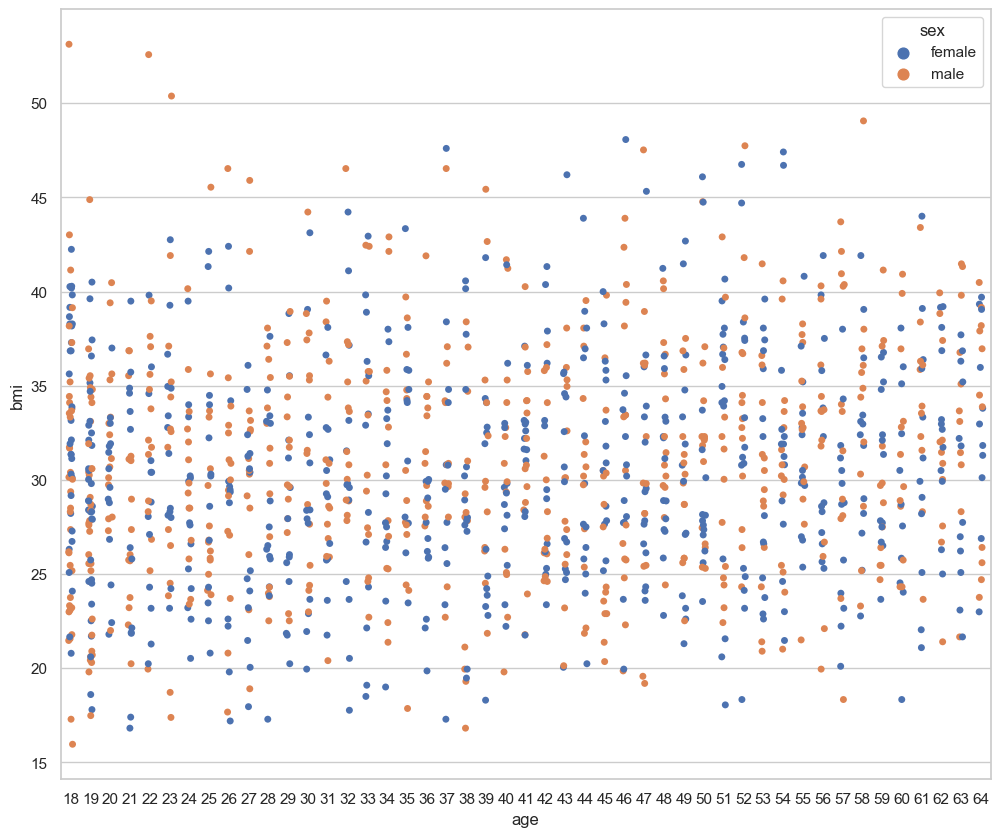

In [36]:
# plotting strip plot to make comparison over distribution of 'sex' with respect to 'bmi' and 'age'
plt.figure(figsize=(12,10))
sns.stripplot(y='bmi',x='age',hue='sex',data=insure)
plt.show()

In [37]:
#applying T-test to analyse the effect of gender on the bmi
Ho = "bmi of males does not differ significantly from females"   
Ha = "bmi of males differ significantly from females"   

x = np.array(insure[insure.sex == 'male'].bmi)  
y = np.array(insure[insure.sex == 'female'].bmi) 

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984932


In [38]:
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

# applying Chi_square test
crosstab = pd.crosstab(insure['sex'],insure['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print(p_value)

0.006548143503580696


In [39]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

# copy females data to another dataframe
fem = insure[insure['sex'] == 'female'].copy()

zero = fem[fem.children == 0]['bmi']
one = fem[fem.children == 1]['bmi']
two = fem[fem.children == 2]['bmi']

# applying Anova Test
f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841
